<a href="https://colab.research.google.com/github/javierber/projects-repo/blob/main/Copy_of_Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 - Part 3 (Core)
We will continue to work on your sales prediction project. The goal of this is to help you understand the data as it relates to the  products and outlets that play crucial roles in increasing sales.

For Part3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:

TASK 1 
**Histogram to view the distributions of various features in your dataset.**  
TASK 2 
**Boxplot to view statistical summaries of various features in your dataset.**  
TASK 3
**Heatmap of the correlation between features.**

TASK 4
**Please feel free to add more than the minimum. Remember this is your chance to display your skills!**

TASK 5
**Commit your work to GitHub.**

Turn in a link to your GitHub repo! We will continue to work on the project a little bit each week.

In [68]:
#Mount
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [69]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
sys.setrecursionlimit(10000)

In [70]:
#Load Data
filename = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'
df = pd.read_csv(filename, header = 0)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [71]:
#Data Size
df.shape

(8523, 12)

In [72]:
#Data Cleanup
df.isnull().sum()
df = df.drop(['Item_Identifier'], axis=1)
df = df.drop(['Outlet_Identifier'], axis=1)

In [73]:
df['Outlet_Size'].value_counts().mean
df.isnull().sum().sum()
median = df['Outlet_Size'].median
df['Outlet_Size'].fillna(median, inplace=True)
df.isnull().sum().sum()

1463

In [74]:
print(df.isnull().sum())

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [75]:
df.dropna(inplace = True)

In [76]:
print(df.isnull().sum())

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [77]:
df['Item_Fat_Content'].value_counts(dropna=False)
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat','Low Fat')
df['Item_Fat_Content'].value_counts(dropna=False)

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

In [103]:
df['Outlet_Establishment_Year'].value_counts(dropna=False)

1987    932
1999    930
1997    930
2004    930
2002    929
2009    928
2007    926
1998    555
Name: Outlet_Establishment_Year, dtype: int64

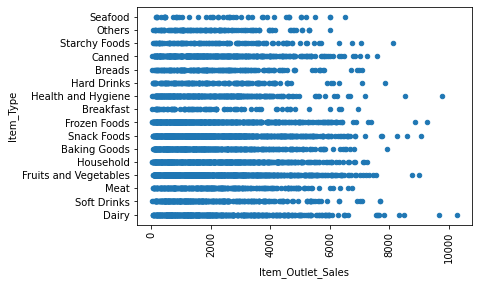

In [110]:
df.plot.scatter(x='Item_Outlet_Sales', y='Item_Type', rot=90)

In [79]:
df['Outlet_Type'].value_counts(dropna=False)

Supermarket Type1    5577
Supermarket Type2     928
Grocery Store         555
Name: Outlet_Type, dtype: int64

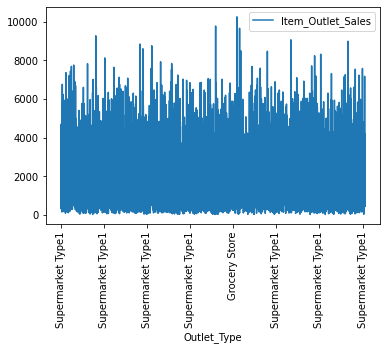

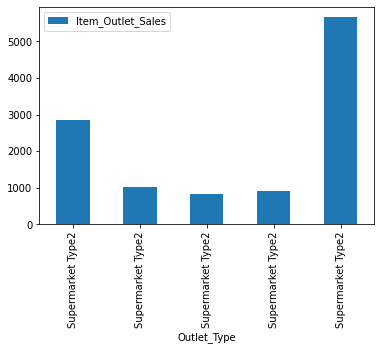

In [80]:
df.plot(x='Outlet_Type', y='Item_Outlet_Sales', rot=90)
top5 = df.sort_values(by='Outlet_Type', ascending=False).head()
top5.plot(x='Outlet_Type', y='Item_Outlet_Sales', kind="bar", rot=90)


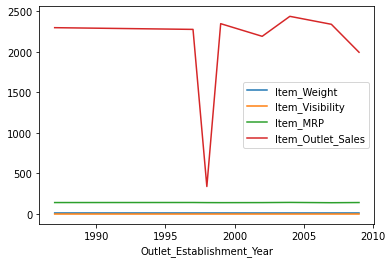

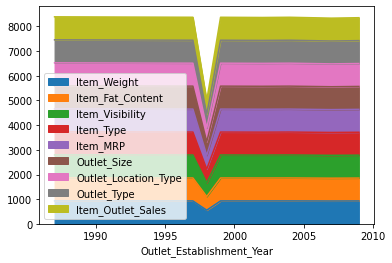

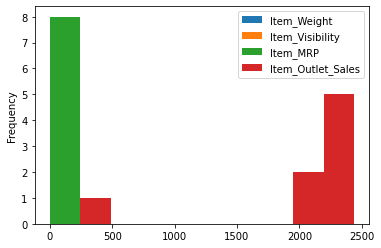

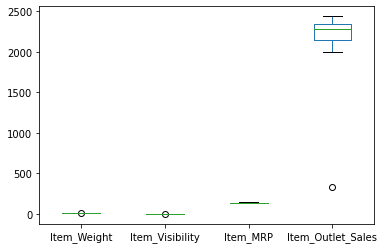

In [81]:
group_by_storeyear = df.groupby(by=['Outlet_Establishment_Year'])
storeyear_avg = group_by_storeyear.mean()
storeyear_count = group_by_storeyear.count()
storeyear_avg
storeyear_avg.plot()
storeyear_count.plot.area()
storeyear_avg.plot.hist()
storeyear_avg.plot.box()

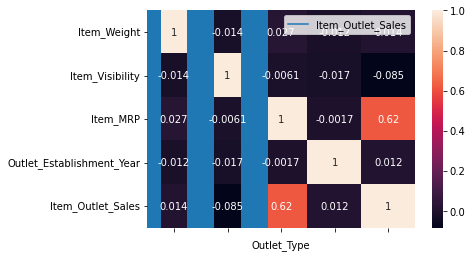

In [100]:
dfstoredeets = df.drop(['Item_Weight','Item_Fat_Content','Item_Visibility', 'Item_Type', 'Item_MRP'], axis=1)
dfstoredeets.plot(x='Outlet_Establishment_Year')
storedeets_avg = dfstoredeets.groupby("Outlet_Type")['Item_Outlet_Sales'].mean()
storedeets_count = dfstoredeets.groupby("Outlet_Type")['Item_Outlet_Sales'].count()
storedeets_avg.plot()
storedeets_count.plot(kind='bar')
#df.groupby('Outlet_Establishment_Year').plot.scatter(x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr, annot = True)
storedeets_avg
storedeets_avg.plot()
